In [1]:
import pandas as pd
import json

with open("./test_json_file.json", "r") as file:
    data = json.load(file)

all_rows = []

# Loop through the data structure
for match in data:  # Iterate over all matches
    # Extract match-level data
    match_event = match.get("info", {}).get("event", {}).get("name", None)
    match_outcome = match.get("info", {}).get("outcome", {})
    match_winner = match_outcome.get("winner", None)
    player_of_match = ", ".join(match.get("info", {}).get("player_of_match", []))
    match_season = match.get("info", {}).get("season", None)
    toss_decision = match.get("info", {}).get("toss", {}).get("decision", None)
    toss_winner = match.get("info", {}).get("toss", {}).get("winner", None)
    venue = match.get("info", {}).get("venue", None)
    
    # Extract innings and deliveries data
    innings = match.get("innings", [])  # Get the innings list
    
    for inning in innings:  # Iterate over each inning
        team_name = inning.get("team")  # Extract team name
        overs = inning.get("overs", [])  # Get overs for the team
        
        for over_data in overs:  # Iterate through each over
            over_number = over_data.get("over")  # Extract the over number
            deliveries = over_data.get("deliveries", [])  # Extract deliveries
            
            for delivery in deliveries:  # Flatten each delivery
                # Check for wickets and extract `player_out` if present
                player_out = "None"  # Default value if no wickets are present
                if "wickets" in delivery:
                    wickets = delivery.get("wickets", [])
                    # Extract player_out for each wicket
                    player_outs = [wicket.get("player_out", "None") for wicket in wickets]
                    player_out = ", ".join(player_outs) if player_outs else "None"
                
                # Add all data into the row
                row = {
                    "Match Event": match_event,
                    "Match Winner": match_winner,
                    "Player of Match": player_of_match,
                    "Season": match_season,
                    "Toss Decision": toss_decision,
                    "Toss Winner": toss_winner,
                    "Venue": venue,
                    "Team": team_name,
                    "Over": over_number,
                    "Batter": delivery.get("batter"),
                    "Bowler": delivery.get("bowler"),
                    "Non-Striker": delivery.get("non_striker"),
                    "Batter Runs": delivery["runs"].get("batter", 0),
                    "Extras Runs": delivery["runs"].get("extras", 0),
                    "Total Runs": delivery["runs"].get("total", 0),
                    "Player Out": player_out  # Add player_out to the row
                }
                all_rows.append(row)

# Create a DataFrame from the collected rows
df = pd.DataFrame(all_rows)

# Save the DataFrame to a CSV file
df.to_csv("Test_data.csv", index=False)

# Display the DataFrame
print(df)


In [32]:
import pandas as pd

# Specify the dtype for column 3 (1-based index)
Test_data = pd.read_csv("Test_data.csv", dtype={3: str})  # Treat column 3 as string

# Display the data to check
print(Test_data.head())


              Match Event Match Winner Player of Match   Season Toss Decision  \
0  Border-Gavaskar Trophy    Australia       A Symonds  2007/08           bat   
1  Border-Gavaskar Trophy    Australia       A Symonds  2007/08           bat   
2  Border-Gavaskar Trophy    Australia       A Symonds  2007/08           bat   
3  Border-Gavaskar Trophy    Australia       A Symonds  2007/08           bat   
4  Border-Gavaskar Trophy    Australia       A Symonds  2007/08           bat   

  Toss Winner                  Venue       Team  Over     Batter    Bowler  \
0   Australia  Sydney Cricket Ground  Australia     0  PA Jaques  RP Singh   
1   Australia  Sydney Cricket Ground  Australia     0  PA Jaques  RP Singh   
2   Australia  Sydney Cricket Ground  Australia     0  PA Jaques  RP Singh   
3   Australia  Sydney Cricket Ground  Australia     0  PA Jaques  RP Singh   
4   Australia  Sydney Cricket Ground  Australia     0  PA Jaques  RP Singh   

  Non-Striker  Batter Runs  Extras Runs  Tot

In [36]:
Test_data = Test_data.rename(columns={
    'Match Event' : 'Match_Event',
    'Match Winner' : 'Match_Winner',
    'Player of Match' : 'Player_of_Match',
    'Toss Decision' : 'Toss_Decision',
    'Toss Winner' : 'Toss_Winner',
    'Non-Striker' : 'Non_Striker',
    'Batter Runs' : 'Batter_Runs',
    'Extras Runs' : 'Extras_Runs',
    'Total Runs' : 'Total_Runs',
    'Player Out' : 'Player_Out'
})

In [37]:
Test_data = Test_data.drop_duplicates()
Test_data.head()

,Match_Event,Match_Winner,Player_of_Match,Season,Toss_Decision,Toss_Winner,Venue,Team,Over,Batter,Bowler,Non_Striker,Batter_Runs,Extras_Runs,Total_Runs,Player_Out
0,Border-Gavaskar Trophy,Australia,A Symonds,2007/08,bat,Australia,Sydney Cricket Ground,Australia,0,PA Jaques,RP Singh,ML Hayden,0,0,0,NaN
6,Border-Gavaskar Trophy,Australia,A Symonds,2007/08,bat,Australia,Sydney Cricket Ground,Australia,1,ML Hayden,I Sharma,PA Jaques,0,0,0,NaN
12,Border-Gavaskar Trophy,Australia,A Symonds,2007/08,bat,Australia,Sydney Cricket Ground,Australia,2,PA Jaques,RP Singh,ML Hayden,0,0,0,NaN
14,Border-Gavaskar Trophy,Australia,A Symonds,2007/08,bat,Australia,Sydney Cricket Ground,Australia,2,PA Jaques,RP Singh,ML Hayden,0,0,0,PA Jaques
15,Border-Gavaskar Trophy,Australia,A Symonds,2007/08,bat,Australia,Sydney Cricket Ground,Australia,2,RT Ponting,RP Singh,ML Hayden,0,0,0,NaN


In [38]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801224 entries, 0 to 1643843
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Match_Event      792548 non-null  object
 1   Match_Winner     621343 non-null  object
 2   Player_of_Match  795121 non-null  object
 3   Season           801224 non-null  object
 4   Toss_Decision    801224 non-null  object
 5   Toss_Winner      801224 non-null  object
 6   Venue            801224 non-null  object
 7   Team             801224 non-null  object
 8   Over             801224 non-null  int64 
 9   Batter           801224 non-null  object
 10  Bowler           801224 non-null  object
 11  Non_Striker      801224 non-null  object
 12  Batter_Runs      801224 non-null  int64 
 13  Extras_Runs      801224 non-null  int64 
 14  Total_Runs       801224 non-null  int64 
 15  Player_Out       27012 non-null   object
dtypes: int64(4), object(12)
memory usage: 103.9+ MB


In [55]:
# Test_data = Test_data.drop(columns=["Non-Striker","Extras Runs"], axis=1).head()

In [40]:
# Group by 'Team' and 'Batter', then sum the 'Batter Runs'
player_runs_by_team = Test_data.groupby(["Team", "Batter"])["Batter_Runs"].sum().reset_index()

# Rename the columns for better readability
player_runs_by_team.columns = ["Team", "Player", "Total_Runs"]

# Display the resulting DataFrame
print(player_runs_by_team)

           Team        Player  Total_Runs
0     Australia     A Gardner         261
1     Australia        A King          50
2     Australia  A Sutherland         352
3     Australia     A Symonds        1187
4     Australia  A Wellington           2
...         ...           ...         ...
1139   Zimbabwe    TR Gripper         111
1140   Zimbabwe    TS Chisoro          27
1141   Zimbabwe     V Sibanda         469
1142   Zimbabwe    VM Nyauchi          52
1143   Zimbabwe  WP Masakadza          44

[1144 rows x 3 columns]


In [41]:
Test_data["Season"].value_counts().head()

Season
2016/17    38905
2011/12    32330
2007/08    31715
2018/19    29185
2012/13    28795
Name: count, dtype: int64

In [42]:
# Filter the data for the season 2016/17
season_data = Test_data[Test_data["Season"] == "2016/17"]

# Group by 'Team' and 'Batter', then sum the 'Batter Runs'
player_runs_by_team = (
    season_data.groupby(["Season","Team", "Batter"])["Batter_Runs"]
    .sum()
    .reset_index()
)

# Sort by 'Batter Runs' in descending order to find the top batsmen
top_batsmen = player_runs_by_team.sort_values(by="Batter_Runs", ascending=False).head(10)

# Rename the columns for better readability
top_batsmen.columns = ["Season","Team", "Player", "Total_Runs"]

# Display the resulting DataFrame
print(top_batsmen)


      Season          Team         Player  Total_Runs
67   2016/17         India      CA Pujara        1179
82   2016/17         India        V Kohli        1110
21   2016/17     Australia      SPD Smith        1035
105  2016/17      Pakistan      Azhar Ali         894
74   2016/17         India        M Vijay         691
121  2016/17  South Africa        D Elgar         679
131  2016/17  South Africa      Q de Kock         676
91   2016/17   New Zealand  KS Williamson         661
65   2016/17         India      AM Rahane         661
2    2016/17     Australia      DA Warner         649


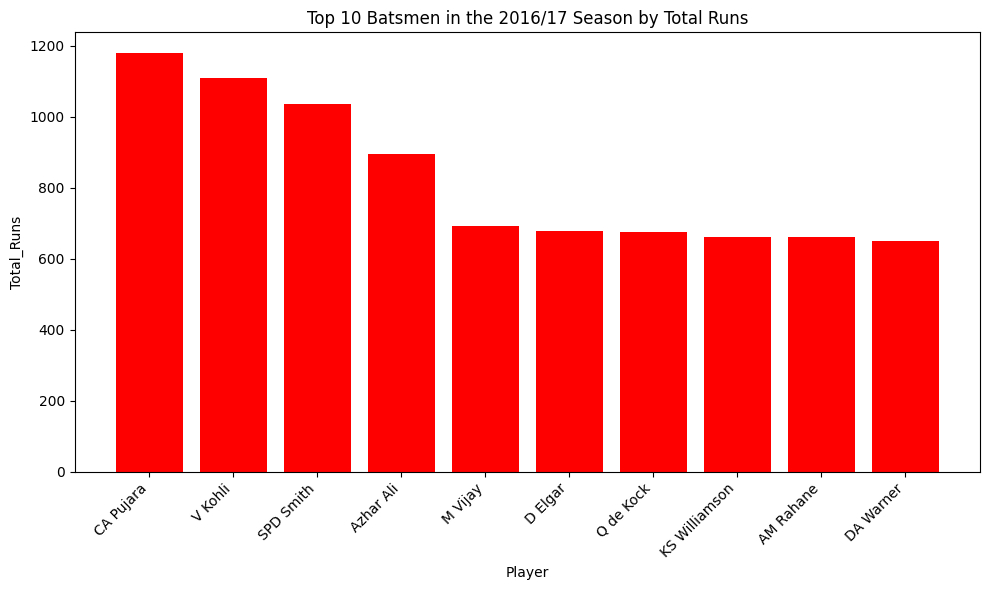

In [43]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_batsmen["Player"], top_batsmen["Total_Runs"], color='red')

# Adding labels and title
plt.xlabel("Player")
plt.ylabel("Total_Runs")
plt.title("Top 10 Batsmen in the 2016/17 Season by Total Runs")
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


In [44]:
import pandas as pd

# Assuming your DataFrame is named 'Test_data'

# Select only numeric columns
numeric_data = Test_data.select_dtypes(include=['number'])

# Calculate the IQR for each numeric column
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find rows where any numeric column has outlier values
outliers = (numeric_data < lower_bound) | (numeric_data > upper_bound)

# Display rows with outliers
outliers_rows = Test_data[outliers.any(axis=1)]

# Display outliers
print(outliers_rows.head())


               Match_Event Match_Winner Player_of_Match   Season  \
22  Border-Gavaskar Trophy    Australia       A Symonds  2007/08   
31  Border-Gavaskar Trophy    Australia       A Symonds  2007/08   
32  Border-Gavaskar Trophy    Australia       A Symonds  2007/08   
41  Border-Gavaskar Trophy    Australia       A Symonds  2007/08   
46  Border-Gavaskar Trophy    Australia       A Symonds  2007/08   

   Toss_Decision Toss_Winner                  Venue       Team  Over  \
22           bat   Australia  Sydney Cricket Ground  Australia     3   
31           bat   Australia  Sydney Cricket Ground  Australia     5   
32           bat   Australia  Sydney Cricket Ground  Australia     5   
41           bat   Australia  Sydney Cricket Ground  Australia     6   
46           bat   Australia  Sydney Cricket Ground  Australia     7   

        Batter    Bowler Non_Striker  Batter_Runs  Extras_Runs  Total_Runs  \
22   ML Hayden  I Sharma  RT Ponting            0            1           1   
31

In [45]:
missing_values = Test_data.isnull()
print(missing_values)

         Match_Event  Match_Winner  Player_of_Match  Season  Toss_Decision  \
0              False         False            False   False          False   
6              False         False            False   False          False   
12             False         False            False   False          False   
14             False         False            False   False          False   
15             False         False            False   False          False   
...              ...           ...              ...     ...            ...   
1643836        False         False            False   False          False   
1643837        False         False            False   False          False   
1643838        False         False            False   False          False   
1643839        False         False            False   False          False   
1643843        False         False            False   False          False   

         Toss_Winner  Venue   Team   Over  Batter  Bowler  Non_

In [54]:
has_missing_values = Test_data.isnull().values.any()       # Now there is no missing or null value
print(has_missing_values)

False


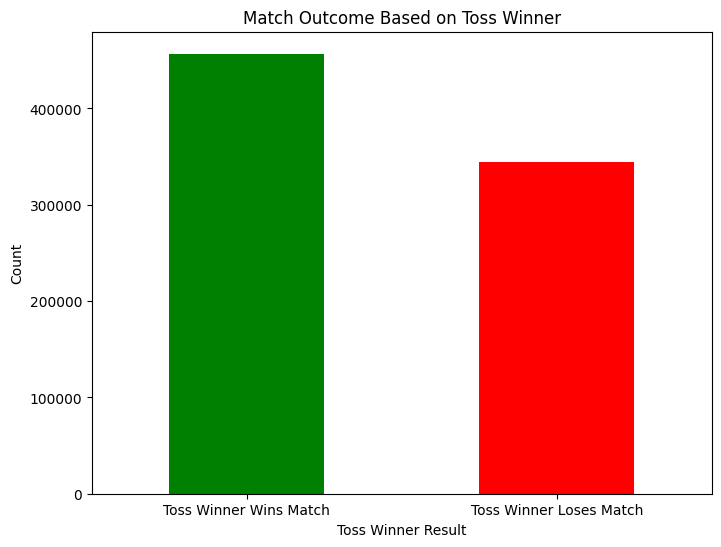

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is loaded into Test_data
# Create a new column to indicate if the toss winner is also the match winner
Test_data['Toss_Match_Winner'] = Test_data['Toss_Winner'] == Test_data['Match_Winner']

# Plotting the comparison
toss_match_winner_counts = Test_data['Toss_Match_Winner'].value_counts()

# Bar chart to show the number of times toss winner wins or loses the match
plt.figure(figsize=(8, 6))
toss_match_winner_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Match Outcome Based on Toss Winner')
plt.xlabel('Toss Winner Result')
plt.ylabel('Count')
plt.xticks([0, 1], ['Toss Winner Wins Match', 'Toss Winner Loses Match'], rotation=0)
plt.show()

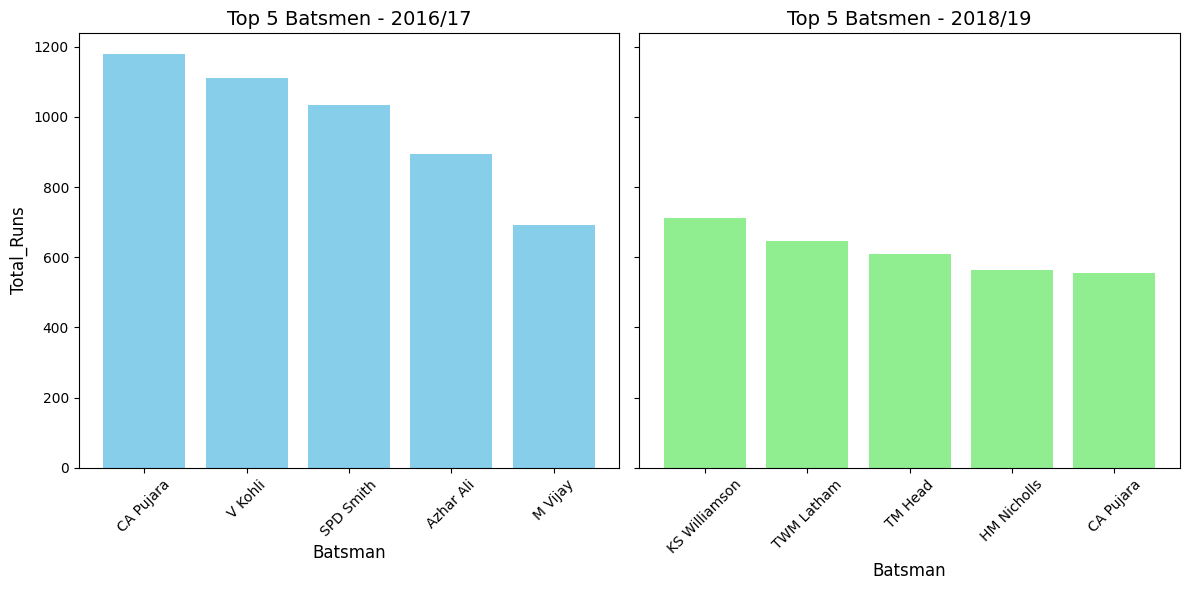

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the two seasons
seasons = ["2016/17", "2018/19"]
filtered_data = Test_data[Test_data['Season'].isin(seasons)]

# Function to get top batsmen for a season
def get_top_batsmen(data, season, top_n=5):
    # Filter data for the specific season
    season_data = data[data['Season'] == season]
    # Group by batsman and calculate total runs
    batsman_runs = season_data.groupby('Batter')['Batter_Runs'].sum().sort_values(ascending=False).head(top_n)
    return batsman_runs

# Get top batsmen for each season
top_batsmen_2016 = get_top_batsmen(filtered_data, "2016/17")
top_batsmen_2018 = get_top_batsmen(filtered_data, "2018/19")

# Plot side-by-side bar graphs
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for 2016/17
axes[0].bar(top_batsmen_2016.index, top_batsmen_2016.values, color='skyblue')
axes[0].set_title("Top 5 Batsmen - 2016/17", fontsize=14)
axes[0].set_xlabel("Batsman", fontsize=12)
axes[0].set_ylabel("Total_Runs", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Plot for 2018/19
axes[1].bar(top_batsmen_2018.index, top_batsmen_2018.values, color='lightgreen')
axes[1].set_title("Top 5 Batsmen - 2018/19", fontsize=14)
axes[1].set_xlabel("Batsman", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


Top 5 bowlers in the 2016/17 season with the most wickets:
Bowler
R Ashwin              2215
RA Jadeja             1948
NM Lyon               1295
Yasir Shah            1130
Mehedi Hasan Miraz    1090
Name: count, dtype: int64


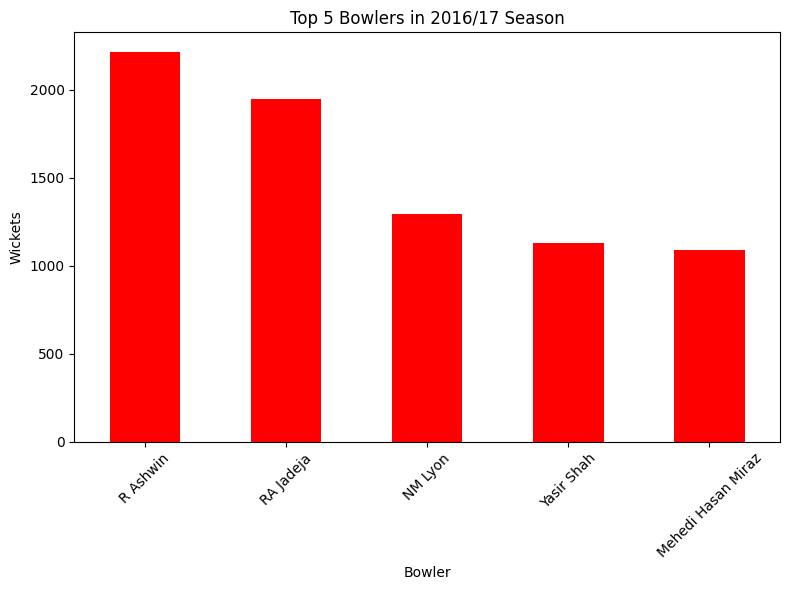

In [58]:
import pandas as pd

# Filter data for the 2016/17 season
season_data = Test_data[Test_data["Season"] == "2016/17"]

# Filter rows where "Bowler" has a value and "Player Out" is not NaN
valid_wickets = season_data[season_data["Player_Out"].notna()]

# Count the number of times each bowler appears in valid rows
bowler_wickets = valid_wickets["Bowler"].value_counts()

# Get the top 5 bowlers
top_5_bowlers = bowler_wickets.head(5)

print("Top 5 bowlers in the 2016/17 season with the most wickets:")
print(top_5_bowlers)

# Plot the top 5 bowlers
top_5_bowlers.plot(kind='bar', figsize=(8, 6), color='Red')
plt.title("Top 5 Bowlers in 2016/17 Season")
plt.xlabel("Bowler")
plt.ylabel("Wickets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


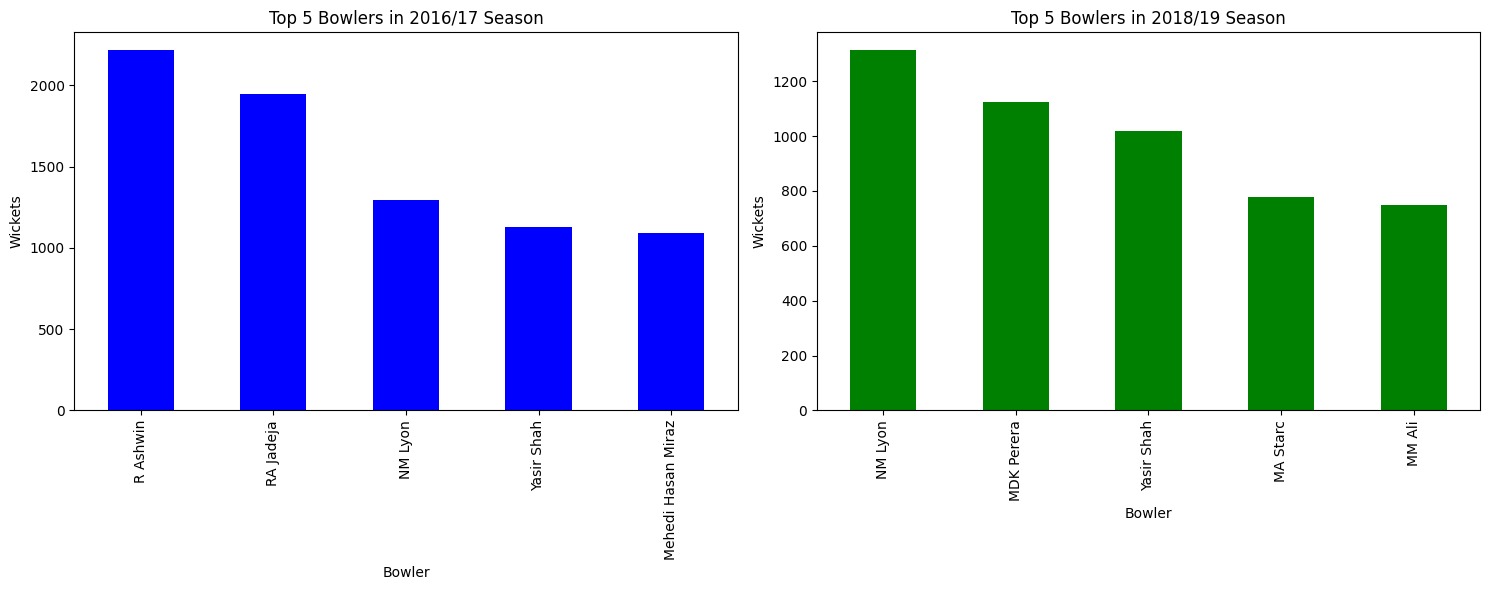

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for 2016/17 and 2018/19 seasons
season_2016_17 = Test_data[Test_data['Season'] == '2016/17']
season_2018_19 = Test_data[Test_data['Season'] == '2018/19']

# Function to find top 5 bowlers based on highest wickets
def top_bowlers(season_data):
    # Filter rows where the bowler has taken a wicket
    wickets_data = season_data.dropna(subset=['Player_Out', 'Bowler'])
    
    # Count wickets taken by each bowler
    bowler_wickets = wickets_data.groupby('Bowler').size().sort_values(ascending=False).head(5)
    
    return bowler_wickets

# Get the top 5 bowlers for both seasons
top_bowlers_2016_17 = top_bowlers(season_2016_17)
top_bowlers_2018_19 = top_bowlers(season_2018_19)

# Create subplots to show the graphs side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for 2016/17 season
top_bowlers_2016_17.plot(kind='bar', ax=axes[0], color='blue', title='Top 5 Bowlers in 2016/17 Season')
axes[0].set_xlabel('Bowler')
axes[0].set_ylabel('Wickets')

# Plot for 2018/19 season
top_bowlers_2018_19.plot(kind='bar', ax=axes[1], color='green', title='Top 5 Bowlers in 2018/19 Season')
axes[1].set_xlabel('Bowler')
axes[1].set_ylabel('Wickets')

# Show the plots
plt.tight_layout()
plt.show()


In [60]:
Test_data.head()

,Match_Event,Match_Winner,Player_of_Match,Season,Toss_Decision,Toss_Winner,Venue,Team,Over,Batter,Bowler,Non_Striker,Batter_Runs,Extras_Runs,Total_Runs,Player_Out,Toss_Match_Winner
0,Border-Gavaskar Trophy,Australia,A Symonds,2007/08,bat,Australia,Sydney Cricket Ground,Australia,0,PA Jaques,RP Singh,ML Hayden,0,0,0,0,True
6,Border-Gavaskar Trophy,Australia,A Symonds,2007/08,bat,Australia,Sydney Cricket Ground,Australia,1,ML Hayden,I Sharma,PA Jaques,0,0,0,0,True
12,Border-Gavaskar Trophy,Australia,A Symonds,2007/08,bat,Australia,Sydney Cricket Ground,Australia,2,PA Jaques,RP Singh,ML Hayden,0,0,0,0,True
14,Border-Gavaskar Trophy,Australia,A Symonds,2007/08,bat,Australia,Sydney Cricket Ground,Australia,2,PA Jaques,RP Singh,ML Hayden,0,0,0,PA Jaques,True
15,Border-Gavaskar Trophy,Australia,A Symonds,2007/08,bat,Australia,Sydney Cricket Ground,Australia,2,RT Ponting,RP Singh,ML Hayden,0,0,0,0,True


In [53]:
Test_data.isnull().sum()

Match_Event        0
Match_Winner       0
Player_of_Match    0
Season             0
Toss_Decision      0
Toss_Winner        0
Venue              0
Team               0
Over               0
Batter             0
Bowler             0
Non_Striker        0
Batter_Runs        0
Extras_Runs        0
Total_Runs         0
Player_Out         0
dtype: int64

In [49]:
# Replace None or NaN values in 'Player Out' column with 0
Test_data['Player_Out'] = Test_data['Player_Out'].fillna(0)

# Verify the replacement
print(Test_data['Player_Out'].head())


0             0
6             0
12            0
14    PA Jaques
15            0
Name: Player_Out, dtype: object


In [50]:
# Replace None or NaN values in 'Player of Match' column with 0
Test_data['Player_of_Match'] = Test_data['Player_of_Match'].fillna(0)

# Verify the replacement
print(Test_data['Player_of_Match'].head())


0     A Symonds
6     A Symonds
12    A Symonds
14    A Symonds
15    A Symonds
Name: Player_of_Match, dtype: object


In [51]:
# Replace None or NaN values in 'Match Event' column with 0
Test_data['Match_Event'] = Test_data['Match_Event'].fillna(0)

# Verify the replacement
print(Test_data['Match_Event'].head())

0     Border-Gavaskar Trophy
6     Border-Gavaskar Trophy
12    Border-Gavaskar Trophy
14    Border-Gavaskar Trophy
15    Border-Gavaskar Trophy
Name: Match_Event, dtype: object


In [52]:
# Replace None or NaN values in 'Match Winner' column with 0
Test_data['Match_Winner'] = Test_data['Match_Winner'].fillna(0)

# Verify the replacement
print(Test_data['Match_Winner'].head())

0     Australia
6     Australia
12    Australia
14    Australia
15    Australia
Name: Match_Winner, dtype: object


In [54]:
Test_data.head()

,Match Event,Match Winner,Player of Match,Season,Toss Decision,Toss Winner,Venue,Team,Over,Batter,Bowler,Non-Striker,Batter Runs,Extras Runs,Total Runs,Player Out
0,Border-Gavaskar Trophy,Australia,A Symonds,2007/08,bat,Australia,Sydney Cricket Ground,Australia,0,PA Jaques,RP Singh,ML Hayden,0,0,0,0
6,Border-Gavaskar Trophy,Australia,A Symonds,2007/08,bat,Australia,Sydney Cricket Ground,Australia,1,ML Hayden,I Sharma,PA Jaques,0,0,0,0
12,Border-Gavaskar Trophy,Australia,A Symonds,2007/08,bat,Australia,Sydney Cricket Ground,Australia,2,PA Jaques,RP Singh,ML Hayden,0,0,0,0
14,Border-Gavaskar Trophy,Australia,A Symonds,2007/08,bat,Australia,Sydney Cricket Ground,Australia,2,PA Jaques,RP Singh,ML Hayden,0,0,0,PA Jaques
15,Border-Gavaskar Trophy,Australia,A Symonds,2007/08,bat,Australia,Sydney Cricket Ground,Australia,2,RT Ponting,RP Singh,ML Hayden,0,0,0,0


In [61]:
Test_data.to_csv("Test_data_final.csv", index=False)